# Data Science Mid-term

## Domain-specifc area & Objectives

In the project, the domain-specific area chosen is the automotive industry in India, specifically focusing on predicting the sale prices of cars. The way that I utilised the linear regression model in this project is very significant as it can be useful for various parties in the industry, be it consumers, dealers or automotive manufacturers.

This project aims to leverage the use of machine learning to enhance the decision-making processes in the car market, giving valuable insights into the factors influencing the sale prices of cars.

The objectives of the project are:
1. Prediction of car prices

   The primary objective of this project is to develop a linear regression model that will accurately predict the sale prices of cars based on various features such as Kms_Driven, year and mileage.
   
   
2. Feature Importance Analysis

   This objective is to investigate and identify the factors that affect the sale prices of cars as it can provide valuable insights for both the buyer and seller to help them make sound decisions in the process.
   
   
3. Understanding the Dyanmics of the Automotive Market

   This objective is to gain a deeper understanding of the car market so that all parties in the industry can identify trends and other patterns that affect the sale prices.
   
   
4. Improving Pricing Strategies

   This objective aims to evaluate the model's predictions and how it can influence the pricing strategies for cars. This is mainly to benefit the dealerships as they can benefit from optimised pricing of cars. The dealerships aren't the only benefactor as the consumers will benefit from a fair market pricing of cars.
   
   
Impact and Contribution to the Domain-Specific Area:

The successful implementation of the linear regression model will have several impacts and contribution to the automotive industry.
1. Informed Decision Making

   Both the sellers and buyers can make more informed decisions when it comes to selling or buying a car, leading to a more transparent market.
   
   
2. Gaining Consumer Trust

   Due to having a more transparent market, the consumers would be more open to the idea of buying a car as they would have the information to confidently enter the car market.
   
   
3. Increased Industry Competitiveness

   By using the linear regression model, companies can gain a competitive edge over those who choose not to utilise the linear regression model as they would have more information for pricing strategies and market insights.
   
   
4. Better Inventory Management

   Dealerships are able to better manage their inventory as they have information about what sells cars better which in turn reduces holding costs and improves business efficiency.
   
Contribution to addressed challenges:
1. Price Opacity

   The lack of transparency in the car market can be addressed as this project offers a model that clearly outlines the factors affecting the sale prices.
   
   
2. Consumer Empowerment

   Consumers now have the knowledge of pricing information which in turn enables them to negotiate a better deal and make sound choices.

## Dataset Description

The dataset that I've chosen for this project is basically a compilation of car information. It comprises of various attributes about the car as well as the selling and present price of the car. This dataset is suitable for building a linear regression model to predict the selling prices based on key features such as:

Car_Name : Name of the cars

Year : Year of the car when it was bought

Selling_Price : Price at which the car is being sold (In INR)

Present_Price : The current ex-showroom price of the car

Kms_Driven : Number of Kilometres the car is driven

Fuel_Type : Fuel type of car (petrol / diesel / CNG / LPG / electric)

Seller_Type : Tells if a Seller is Individual or a Dealer

Transmission : Gear transmission of the car (Automatic/Manual)

Owner : Number of previous owners of the car

Engine: Type of engine

Max_power: Horsepower of the car

Torque: A measurement of the car's ability to do work

Seats: Number of seats in the car

Acquiring the Data:

The dataset was found on kaggle.com which is known for providing datasets for machine learning projects.

Dataset Size and Type:

The dataset has 8,128 entries before cleaning the data, with each entry representing a unique car record. The data types includes integers and floats for quantitative features such as Year, Selling_Price and Present_Price to name a few. There are categorical features like Fuel_Type, Seller_Type and Transmission to name a few, that are encoded with appropriate labels.

Relevance to project:

The dataset is highly relevant to the project's objectives as it provides key information and details to be considered as features influencing the sale prices of cars. There is also a wide range of information which allows for a comprehensive exploration of factors that may or may not affect the pricing, making it ideal for a linear regression model.

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.simplefilter("ignore")
pd.options.display.float_format = '{:,.2f}'.format  
pd.options.display.max_columns = 999
df = pd.read_csv("CarDetailsV3.csv")

## Cleaning of Data

In [41]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.00
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.00
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.00


As you can see from the dataset above, the columns of mileage, engine, max_power and torque have strings which requires cleaning

In [42]:
df['max_power'] = df['max_power'].str.extract(r'(\d+\.*\d*)').astype(float)
df['mileage'] = df['mileage'].str.extract(r'(\d+\.*\d*)').astype(float)
df['engine'] = df['engine'].str.extract(r'(\d+\.*\d*)').astype(float)
df[['torque', 'rpm']] = df['torque'].str.split('/|@|at', n=1, expand=True)
df = df.drop('rpm', axis=1)
df['torque'] = df['torque'].str.extract(r'(\d+\.*\d*)').astype(float)
df['torque'] = df['torque'].apply(lambda x: 9.81*x if x <= 50 else x)

In [43]:
df['name'].nunique()

2058

This shows that there are 2058 unique values in the first column name.
So I will try to remove the model name and keep this variable as the brand name.

In [44]:
df['name'] = df['name'].str.extract(r'(\w+)')
df['name'].nunique()

32

In [45]:
df.loc[df['name'].isin((df['name'].value_counts()[df['name'].value_counts() < 10]).index), 'name'] = 'other'

Extraction of the alphanumeric words from the 'name' column and replaces the original 'name' column with the extracted car brands

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   float64
 9   engine         7907 non-null   float64
 10  max_power      7912 non-null   float64
 11  torque         7906 non-null   float64
 12  seats          7907 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 825.6+ KB


This shows that there are still some missing values in a couple of the columns

### Clearing of missing values

In [47]:
df.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        216
torque           222
seats            221
dtype: int64

As we can see, there are NA values in several of the columns which we must get rid of.

In [48]:
df[df.isna().any(axis=1)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
13,Maruti,2007,200000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
31,Fiat,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
78,Tata,2003,50000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
87,Maruti,2015,475000,78000,Diesel,Dealer,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
119,Maruti,2010,300000,120000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7846,Toyota,2000,200000,100000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
7996,Hyundai,2000,140000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
8009,Hyundai,2006,145000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
8068,Ford,2017,580000,165000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN


This shows that the missing values are in the same columns so we can drop those rows.

In [49]:
df = df.dropna().reset_index(drop=True)
clean_data = df.copy()

## Statistical Analysis 

In [50]:
object_cols = clean_data.select_dtypes(object).columns.values.tolist()
number_cols = clean_data.select_dtypes(np.number).columns.values.tolist()

In [51]:
clean_data[number_cols].describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats
count,7906,7906,7906,7906,7906,7906,7906,7906
mean,2013.98,649814,69188.7,19.4199,1458.71,91.5874,177.514,5.41639
std,3.8637,813583,56792.3,4.03626,503.893,35.7472,90.9081,0.959208
min,1994,29999,1,0,624,32.8,47.088,2
25%,2012,270000,35000,16.78,1197,68.05,111.834,5
50%,2015,450000,60000,19.3,1248,82,170,5
75%,2017,690000,95425,22.32,1582,102,205,5
max,2020,1e+07,2.36046e+06,42,3604,400,789,14


This shows the general description of the data frame and I utilized lambda to remove the trailing zeros in the data frame

### Measures of central tendency 

In [52]:
clean_data.describe()

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats
count,"7,906.00","7,906.00","7,906.00","7,906.00","7,906.00","7,906.00","7,906.00","7,906.00"
mean,"2,013.98","649,813.72","69,188.66",19.42,"1,458.71",91.59,177.51,5.42
std,3.86,"813,582.75","56,792.30",4.04,503.89,35.75,90.91,0.96
min,"1,994.00","29,999.00",1.00,0.00,624.00,32.80,47.09,2.00
25%,"2,012.00","270,000.00","35,000.00",16.78,"1,197.00",68.05,111.83,5.00
50%,"2,015.00","450,000.00","60,000.00",19.30,"1,248.00",82.00,170.00,5.00
75%,"2,017.00","690,000.00","95,425.00",22.32,"1,582.00",102.00,205.00,5.00
max,"2,020.00","10,000,000.00","2,360,457.00",42.00,"3,604.00",400.00,789.00,14.00


This shows that there are outliers in the dataset

#### Mean of Selling Prices

In [53]:
dp2 = round(clean_data['selling_price'].mean(), 2)
print(dp2)

649813.72


#### Median of Selling Prices

In [54]:
clean_data['selling_price'].median()

450000.0

#### Mode of Selling Prices

In [55]:
clean_data['selling_price'].mode()

0    300000
Name: selling_price, dtype: int64

### Measures of spread 

In [56]:
range_values = clean_data['selling_price'].max() - clean_data['selling_price'].min()
variance = clean_data['selling_price'].var()
st_d = clean_data['selling_price'].std()
int_q_r = clean_data['selling_price'].quantile(0.75) - clean_data['selling_price'].quantile(0.25)

print("Range:", range_values)
print("Variance:", variance)
print("Standard Deviation:", st_d)
print("Interquartile Range (IQR):", int_q_r)

Range: 9970001
Variance: 661916888419.4674
Standard Deviation: 813582.7483541347
Interquartile Range (IQR): 420000.0


This shows that the selling prices has a wide range of values (Shown by the large range and standard deviation). 

The interquartile range shows that the middle 50% of the data is concentrated within a range of 420,000 units.

The high variance and standard deviation values suggests that there is a significant variability in the dataset.

### Type of distribution 

In [57]:
from scipy.stats.mstats import normaltest

In [59]:
for col in number_cols:
    print({col: normaltest(clean_data[col])[1]})

{'year': 4.416657523044648e-249}
{'selling_price': 0.0}
{'km_driven': 0.0}
{'mileage': 5.297305862636734e-21}
{'engine': 2.831502477495525e-267}
{'max_power': 0.0}
{'torque': 0.0}
{'seats': 0.0}


In [60]:
kurtosis_result = clean_data[number_cols].kurtosis()
print(f"Kurtosis: {kurtosis_result}")

Kurtosis: year              1.27
selling_price    20.63
km_driven       388.68
mileage           0.57
engine            0.73
max_power         3.80
torque            2.55
seats             3.81
dtype: float64


The 'selling_price' has a significantly high positive kurtosis of 20.63, suggesting a very heavy-tailed distribution with an extremely peaked shape. This implies that the distribution of selling prices has a few outliers that are far from the mean.
In addition, 'km_driven' has a positive kurtosis of 388.68, indicating an extremely heavy-tailed distribution with an exceptionally peaked shape. This suggests the presence of significant outliers in the data.
This shows that the numericals variables aren't normally distributed, below I will show visualisations of it

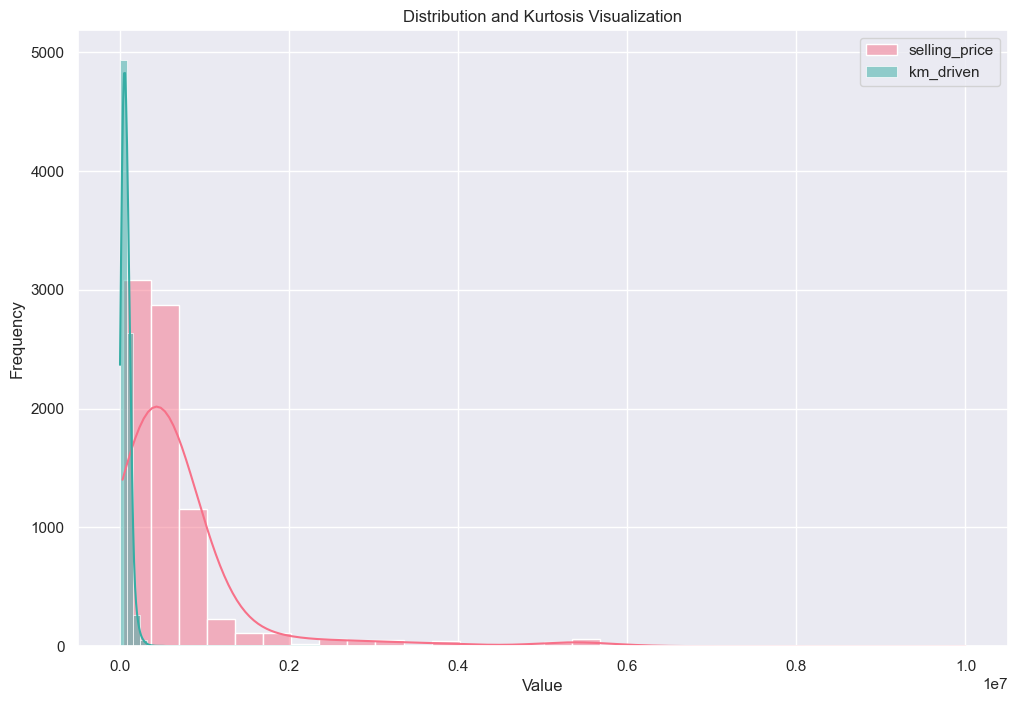

In [64]:
kurtosis_values = pd.Series({
    
    'selling_price': 20.63,
    'km_driven': 388.68,
    
})

# Define colors for each column
colors = sns.color_palette("husl", len(kurtosis_values))

# Plotting histograms for each column with color-coding
plt.figure(figsize=(12, 8))
for col, color in zip(kurtosis_values.index, colors):
    sns.histplot(clean_data[col], kde=True, label=col, bins=30, kde_kws={'bw_method': 0.5}, color=color)

plt.title('Distribution and Kurtosis Visualization')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Above is the kurtosis graph and it shows that the general distribution of the data for selling_price and km_driven is skewed, having a long right tail 

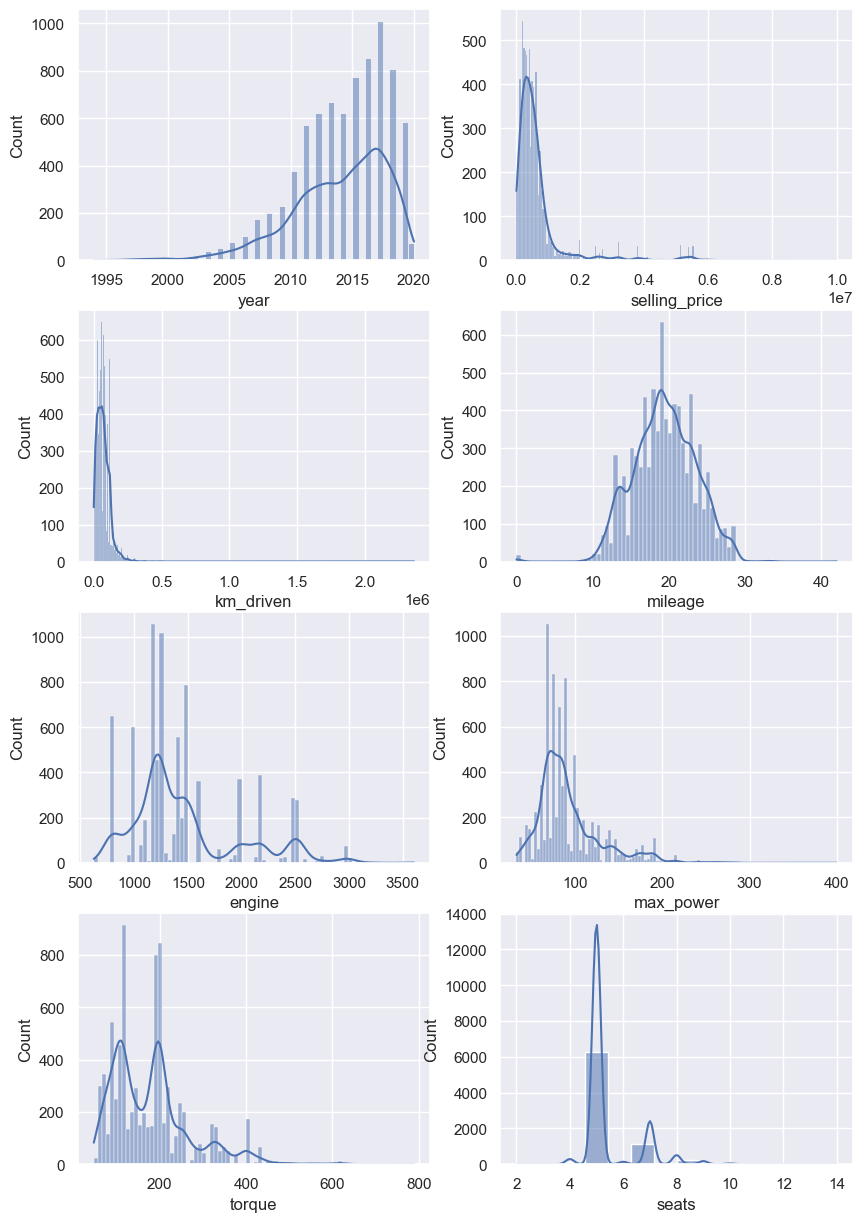

In [61]:
fig = plt.figure(figsize=[10, 15])
for col in range(len(number_cols)):
    plt.subplot(4,2,col+1)
    sns.histplot(x=number_cols[col], data=clean_data, kde=True)

After comparing kurtosis and skeweness, I believe that skeweness is better due to the fact that it focuses on more of the normal distribution.

Since the selling price data is generally skewed, I will put the data through various transformations to reduce the right-skewed data distribution.

In [22]:
from scipy.stats import boxcox
results_of_boxcox = boxcox(clean_data['selling_price'])
y_boxcox = results_of_boxcox[0]
y_lambda = results_of_boxcox[1]

Text(0.5, 1.0, 'Boxcox Tranformation')

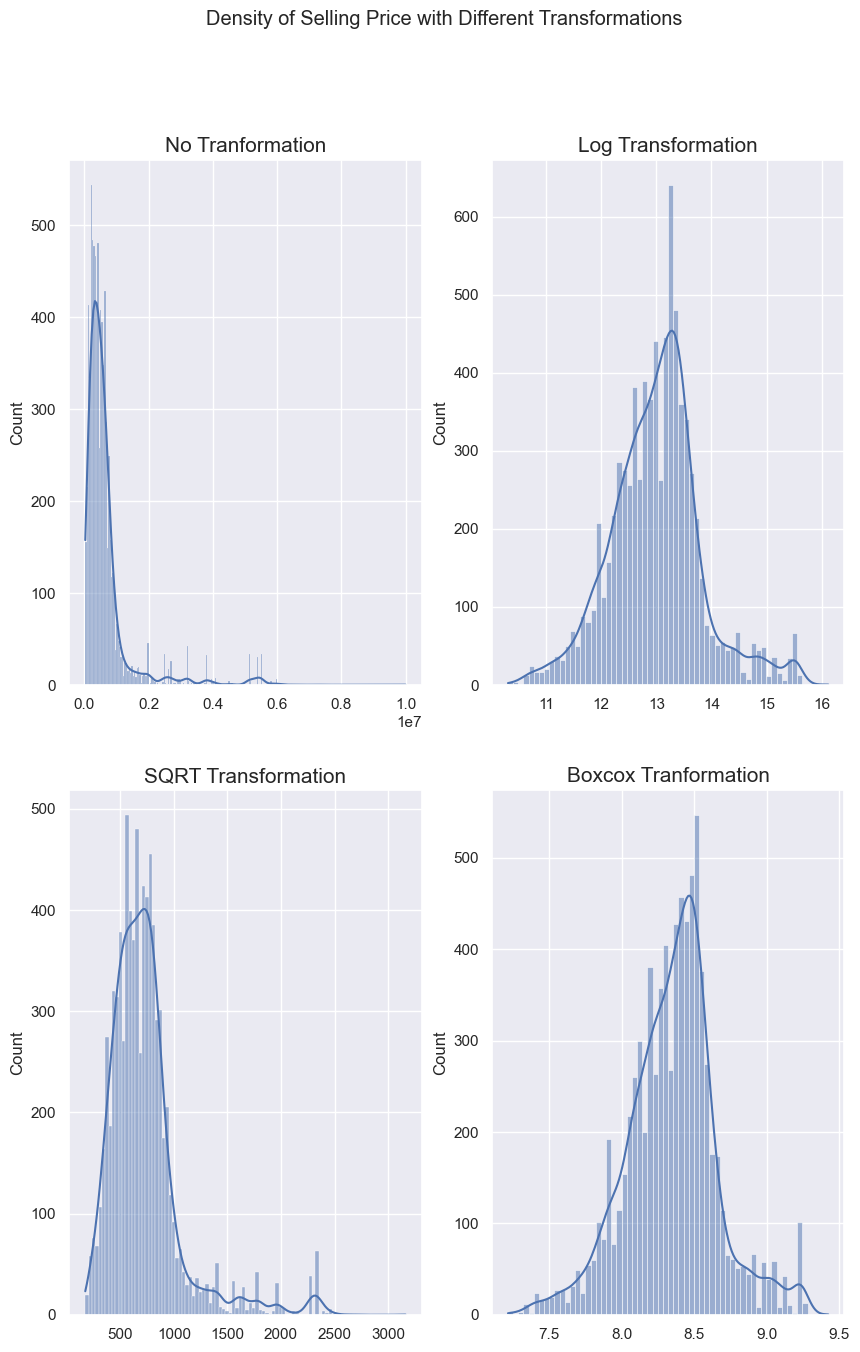

In [23]:
fig, axes = plt.subplots(2,2, figsize=(10, 15))
fig.suptitle('Density of Selling Price with Different Transformations')

sns.histplot(ax=axes[0,0], x=clean_data['selling_price'], kde=True).set_xlabel(None)
axes[0,0].set_title('No Tranformation', fontsize=15)
sns.histplot(ax=axes[0,1], x=np.log(clean_data['selling_price']), kde=True).set_xlabel(None)
axes[0,1].set_title('Log Transformation', fontsize=15)
sns.histplot(ax=axes[1,0], x=np.sqrt(clean_data['selling_price']), kde=True).set_xlabel(None)
axes[1,0].set_title('SQRT Transformation', fontsize=15)
sns.histplot(ax=axes[1,1], x=y_boxcox, kde=True)
axes[1,1].set_title('Boxcox Tranformation', fontsize=15)

I will choose the log transformation based on our output variable selling_price as the selling price has a relatively large right skewed distribution in the graphs earlier on.

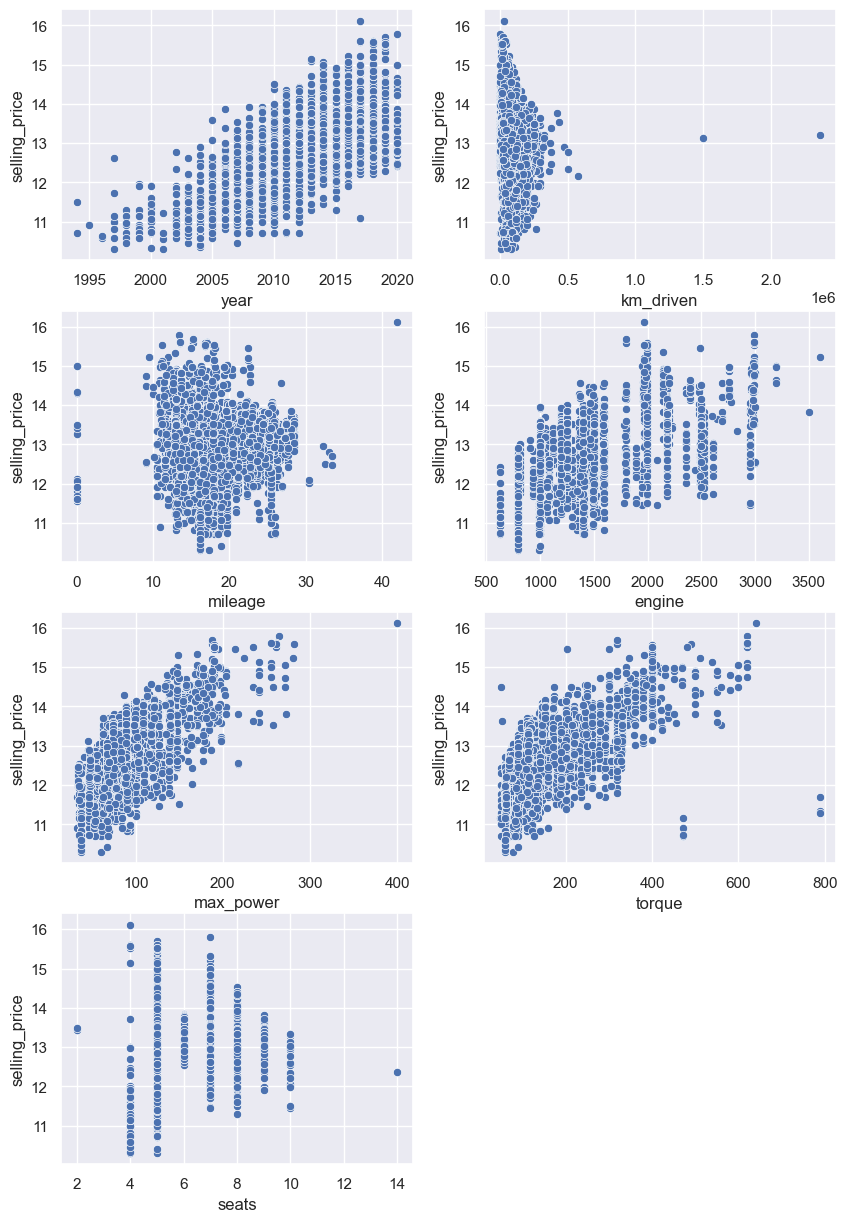

In [24]:
if 'selling_price' in number_cols:
    number_cols.remove('selling_price')
fig = plt.figure(figsize=[10, 15])
for col in range(len(number_cols)):
    plt.subplot(4, 2, col+1)
    sns.scatterplot(x = number_cols[col], y = np.log(clean_data['selling_price']), data = clean_data)

This shows that there isn't a clear relationship between the selling price and km_driven due to the outliers in the scatter plot graph shown above. 

This also helps us in answering one of the questions for this report, whether km_driven affects the selling price.

In [25]:
clean_data.sort_values(by=['km_driven'], ascending=False).head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
3377,Hyundai,2007,550000,2360457,Petrol,Individual,Manual,Second Owner,18.60,"1,197.00",81.83,114.70,5.00
1757,Mahindra,2012,500000,1500000,Diesel,Individual,Manual,First Owner,15.10,"2,179.00",140.00,330.00,7.00
3399,Maruti,2010,194000,577414,Petrol,Individual,Manual,Second Owner,18.90,"1,061.00",67.00,84.00,5.00
3528,Maruti,2011,229999,500000,Petrol,Individual,Manual,Second Owner,18.90,998.00,67.10,90.00,5.00
6488,Toyota,2011,350000,500000,Diesel,Individual,Manual,Second Owner,12.99,"2,494.00",100.57,200.00,7.00


This shows that there are 2 outliers for the km_driven and should be removed to get a clearer understanding

In [26]:
ro_data = clean_data.drop(clean_data[clean_data['km_driven'] > 600000].index).reset_index(drop=True)

<AxesSubplot:xlabel='km_driven', ylabel='selling_price'>

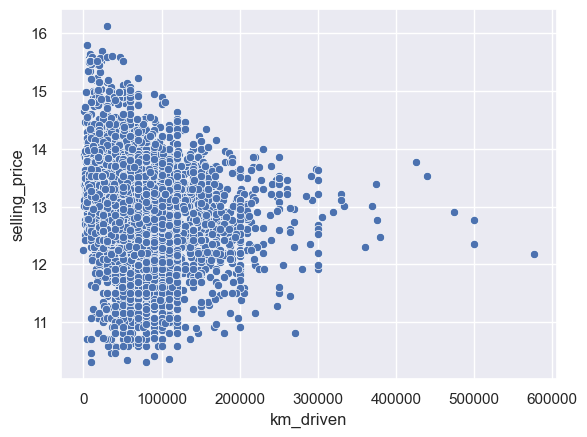

In [27]:
sns.scatterplot(x='km_driven', y=np.log(ro_data['selling_price']), data= ro_data)

After removing the outliers, the graph becomes more precise. However, there still isn't a clear relationship between selling_price and km_driven

### Analysis of Cars

In [28]:
ro_data['year'] = pd.to_datetime(df['year'], format='%Y')

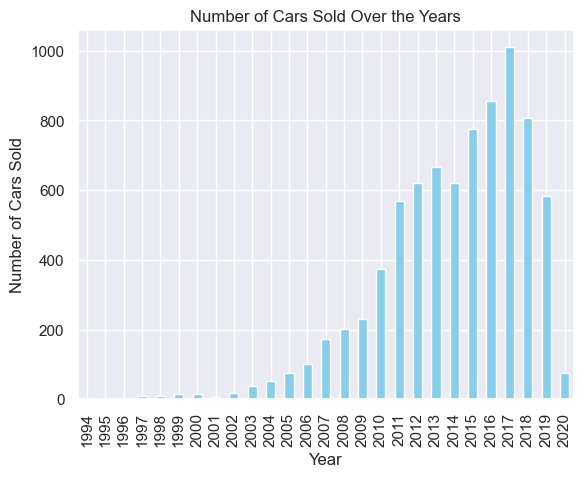

In [29]:
ro_data['year'].dt.year.value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Cars Sold')
plt.title('Number of Cars Sold Over the Years')
plt.show()

This shows that there is a general increase in sales of cars in India from 1997 - 2017.
After 2017, there's a downward trend of sales.

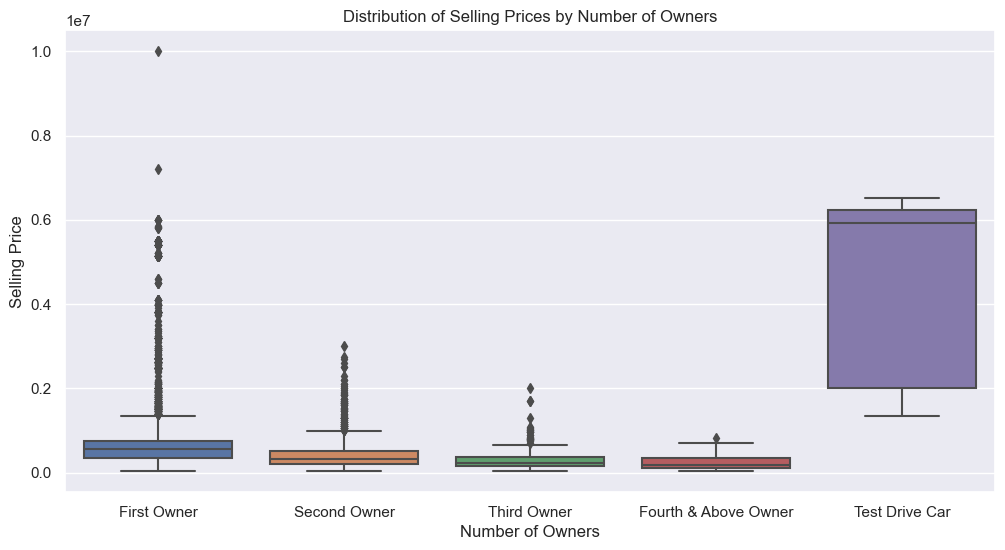

In [110]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='owner', y='selling_price', data= ro_data)
plt.xlabel('Number of Owners')
plt.ylabel('Selling Price')
plt.title('Distribution of Selling Prices by Number of Owners')
plt.show()

The graph above shows the prices of cars sold according to the 'Number of Owners'.



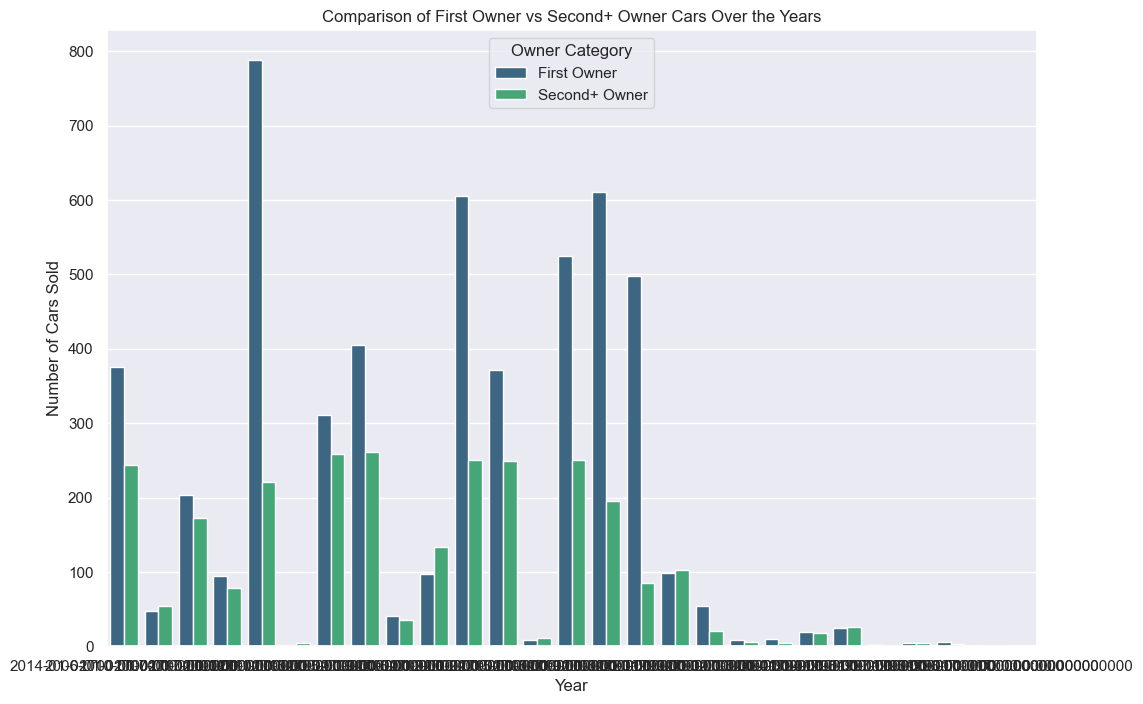

In [113]:
ro_data['owner'] = ro_data['owner'].str.lower()
ro_data['owner_category'] = ro_data['owner'].apply(lambda x: 'First Owner' if 'first' in x else 'Second+ Owner')

# Now, you can proceed with the countplot
plt.figure(figsize=(12, 8))
sns.countplot(x='year', hue='owner_category', data=ro_data, palette='viridis')
plt.xlabel('Year')
plt.ylabel('Number of Cars Sold')
plt.title('Comparison of First Owner vs Second+ Owner Cars Over the Years')
plt.legend(title='Owner Category')
plt.show()

This shows that there isn't a particular trend in the fact that second hand or more owner cars in India are getting more popular.

#### Analysis of heatmap

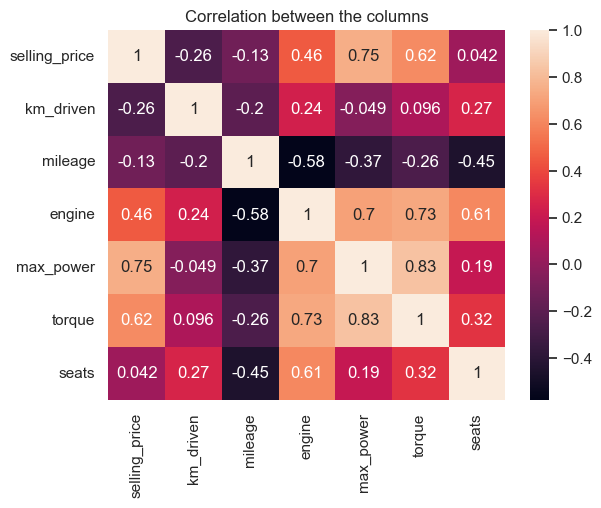

In [114]:
sns.heatmap(ro_data.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()

This allows us to view the correlation between columns with a heatmap, and it shows that torque and max_power has the highest correlation. Whilst for what i'm focusing on, which is selling_price, the highest correlation with it is max_power, 0.75.

## Linear Regression

In [193]:
data_d = pd.get_dummies(ro_data, drop_first = True)

In [198]:
from sklearn.model_selection import train_test_split
import numpy as np
y = data_d['selling_price']
x = data_d.drop('selling_price', axis = 1)
# Converts 'year' to an int instead of datetime
data_d['year'] = data_d['year'].astype(np.int64) // 10**9

The codes above splits the data into input features (x) and target variable (y)

In [199]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.1, random_state = 300)

In [200]:
xTrain = xTrain.rename(columns={'owner_fourth & above owner': 'owner_fourth_and_above_owner'})

In [202]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
Scaler = MinMaxScaler()
xTrain_Scaled = Scaler.fit_transform(xTrain)

In [203]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
Linear_Reg = LinearRegression()

In [204]:
yTrain_log = np.log(yTrain)
yTest_log = np.log(yTest)

In [205]:
Linear_Reg.fit(xTrain_Scaled, yTrain_log)
Linear_Reg.score(xTrain_Scaled, yTrain_log)

0.7988531239156872

In [206]:
xTest_Scaled = Scaler.transform(xTest)

In [207]:
yPredict = Linear_Reg.predict(xTest_Scaled)

In [208]:
r2_score(yPredict, yTest_log)

0.7214687380460529

[Text(0.5, 0, 'Predicted Price'),
 Text(0, 0.5, 'Actual Price'),
 Text(0.5, 1.0, 'Actual vs Predicted Price of Test data')]

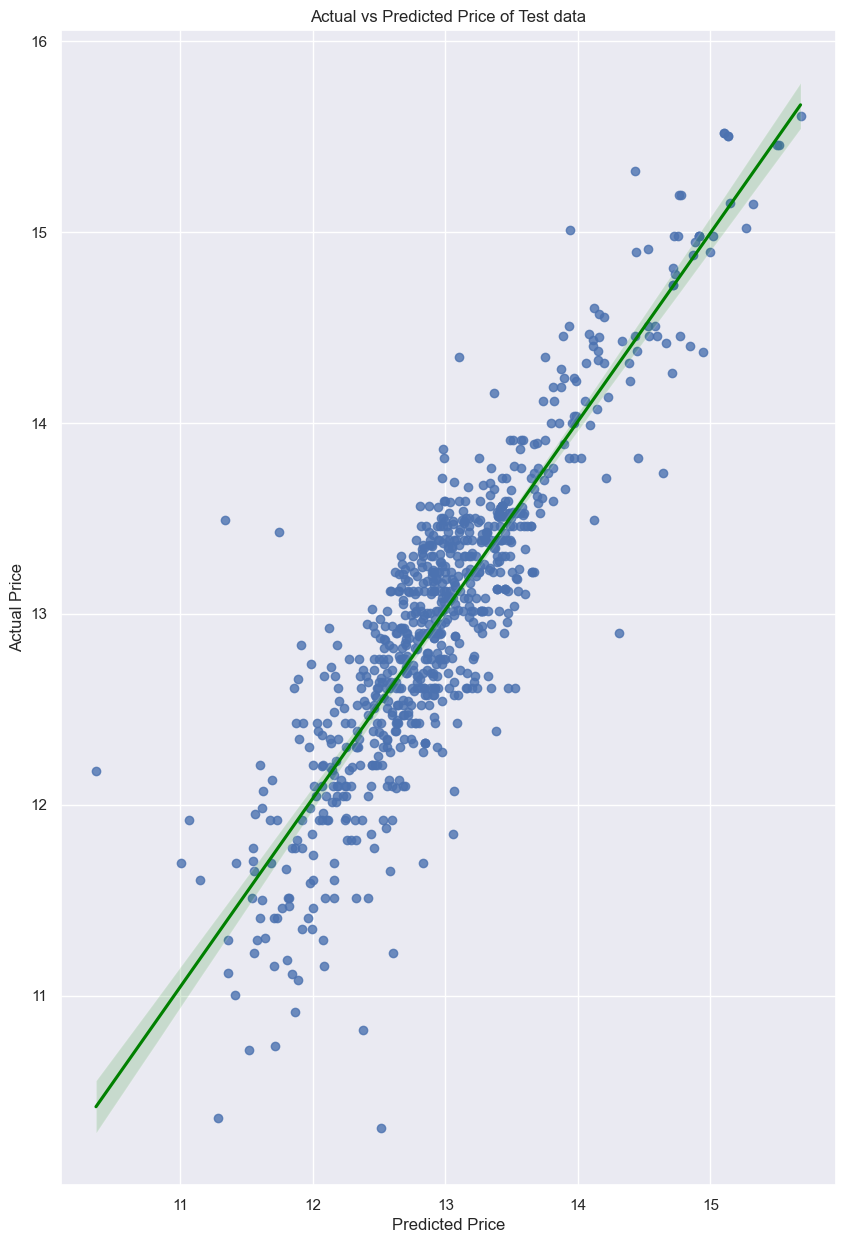

In [209]:
fig = plt.figure(figsize=[10, 15])
ax = sns.regplot(yPredict, yTest_log, line_kws={'color': 'green'})
ax.set(xlabel = 'Predicted Price', ylabel = 'Actual Price', title='Actual vs Predicted Price of Test data')

This shows the actual price in the dataset against the predicted price through linear regression.

In [210]:
pd.DataFrame({'Actual': yTest_log, 'Predicted': yPredict}).corr()

,Actual,Predicted
Actual,1.00,0.88
Predicted,0.88,1.00


This shows that there's a correlation between observed and predicted values of 88%. Which is a relatively good score.

In [211]:
mse = mean_squared_error(yPredict, yTest_log)
rmse = np.sqrt(mse)
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MSE: 0.14838818363522707
RMSE: 0.38521186850255157


Using the RMSE, we can tell the the model has produced prediction values closer to the actual values as it has a relatively low score.

Below I will try cross validation, using higher order polynomial regression and ridge regression to avoid overfitting and improve the model score.

### Higher Order Polynomial & Ridge Regression

In [212]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold

In [213]:
cross_v = KFold(shuffle = True, random_state = 300, n_splits = 5)

I will now find the best hyperparameters by performing a grid search 

In [214]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Uses pipeline
est = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("ridge_regression", Ridge())])

params = {
    'polynomial_features__degree': [1, 2],
    'ridge_regression__alpha': np.geomspace(180, 200, 30)
}

In [215]:
grid = GridSearchCV(est, params, cv=cross_v)
grid.fit(xTrain, yTrain_log)
grid.best_score_, grid.best_params_

(0.8498748015949298,
 {'polynomial_features__degree': 2, 'ridge_regression__alpha': 200.0})

This shows that higher order polynomial degree 2 is needed to improve the model score and that the High Alpha score of 200 means that more shrinkage of coefficients, simpler model and less prone to overfitting.

In [216]:
best_degree = grid.best_params_['polynomial_features__degree']
best_alpha = grid.best_params_['ridge_regression__alpha']

final_model = Pipeline([
    ("scaler", StandardScaler()),
    ("polynomial_features", PolynomialFeatures(degree=best_degree, include_bias=False)),
    ("ridge_regression", Ridge(alpha=best_alpha))
])

final_model.fit(xTrain, yTrain_log)

Pipeline(steps=[('scaler', StandardScaler()),
                ('polynomial_features', PolynomialFeatures(include_bias=False)),
                ('ridge_regression', Ridge(alpha=200.0))])

In [217]:
yPred = final_model.predict(xTest)

# Calculate metrics
FPRRmse = mean_squared_error(yTest_log, yPred)
FPRRrmse = np.sqrt(mse)
FPRRr2 = r2_score(yTest_log, yPred)

print(f"Final Polynomial Ridge Regression MSE: {FPRRmse}")
print(f"Final Polynomial Ridge Regression RMSE: {FPRRrmse}")
print(f"Final Polynomial Ridge Regression R-squared: {FPRRr2}")

Final Polynomial Ridge Regression MSE: 0.12533793640297383
Final Polynomial Ridge Regression RMSE: 0.38521186850255157
Final Polynomial Ridge Regression R-squared: 0.8120605531254441


In [218]:
pd.DataFrame({'Actual': yTest_log, 'Predicted': yPredict}).corr()

,Actual,Predicted
Actual,1.00,0.88
Predicted,0.88,1.00


This shows that the correlation stayed the same as before

[Text(0.5, 0, 'Predicted values'),
 Text(0, 0.5, 'Actual values'),
 Text(0.5, 1.0, 'Actual vs Predicted values of Test data')]

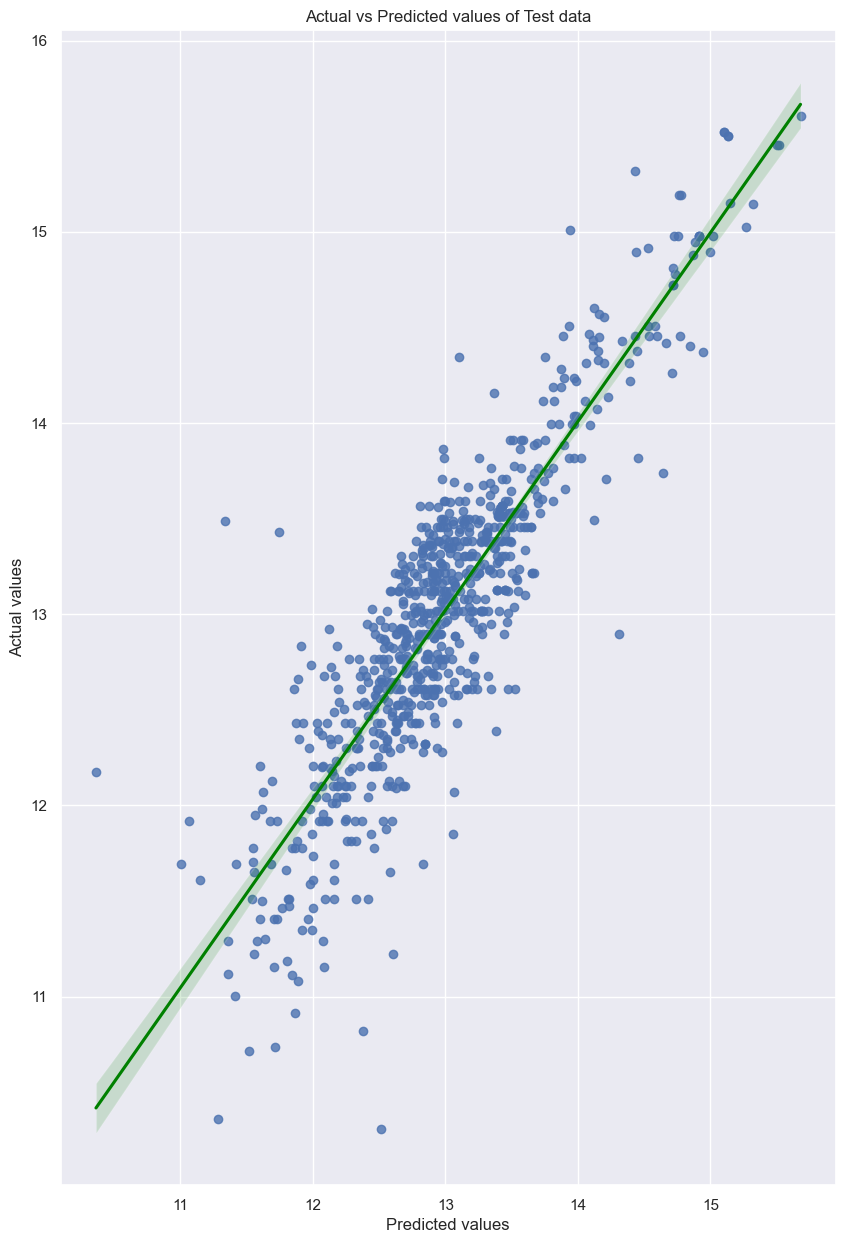

In [219]:
fig = plt.figure(figsize=[10, 15])
ax = sns.regplot(yPredict, yTest_log, line_kws={'color': 'green'})
ax.set(xlabel = 'Predicted values', ylabel = 'Actual values', title='Actual vs Predicted values of Test data')


As you can see, the points are now better fitted as they're closer to the line, reducing overfitting

In [220]:
coefficients_ridge = final_model.named_steps['ridge_regression'].coef_
intercept_ridge = final_model.named_steps['ridge_regression'].intercept_

# Display coefficients
print("Intercept (Ridge):", intercept_ridge)
print("Coefficients (Ridge):")
for feature, coef in zip(xTrain.columns, coefficients_ridge):
    print(f"{feature}: {coef}")

Intercept (Ridge): 13.162979654724456
Coefficients (Ridge):
year: 0.039290949209108035
km_driven: -0.209333319293041
mileage: 0.14840335615818473
engine: 0.08077790341997898
max_power: 0.2921544912609906
torque: 0.21795090176859183
seats: 0.11072066452466281
name_BMW: 0.0006539769546956497
name_Chevrolet: -0.0029353792320841324
name_Datsun: -0.00032142390299872125
name_Fiat: -0.00018782864328338925
name_Ford: -0.0011586781053665657
name_Honda: -0.00044893782420698104
name_Hyundai: -0.004703536099806964
name_Jaguar: 0.0010218891234913899
name_Jeep: 6.929359141343483e-05
name_Lexus: 0.00046818041740216774
name_Mahindra: -0.002842034835990972
name_Maruti: 0.0006626779868019618
name_Mercedes: -0.0002360962314517129
name_Mitsubishi: -3.893350894574187e-05
name_Nissan: -0.00013790711516579394
name_Renault: -0.0001424180644833915
name_Skoda: -0.00015997577679087227
name_Tata: -0.008932356875020699
name_Toyota: 0.0018006122685611764
name_Volkswagen: -0.00044143928997186294
name_Volvo: 0.000529

Interpretation of coefficients:

Intercept(Ridge) - The expected log selling price when all the other features are 0.

In general, not many features have an direct relationship with the selling price except for "year", "engine", "max_power" and "torque", which is not surprising as they are general features of a car that would drive the price up or down. 

But there are a few features that have a inverse relationship with the selling price, such as "km_driven", "mileage" and "seats", which also makes sense because if a car has lesser mileage on it, it would generally go for a higher price.

To summarize the results, the features that have a bigger impact on predicting the selling price would be "year", "engine", and "max_power", due to the magnitude of the coefficients.

## Evaluation of Machine Learning Model

The evaluation of the machine learning model provided insightful results as it offered a comprehensive understanding of their performance and contributions to the automotive domain.

Evaluation of numbers:

The performance of the linear regression models was assessed using key metrics.
The first linear regression gave an R-squared value of 0.702, which indicates a substansial portion of the selling price varies. The use of Mean Sqaured Error (MSE) and Root Mean Squared Error (RMSE) further validated the model's accuracy with a score of 0.148 and 0.385.

Justification of RMSE:

RMSE was chosen as an appropriate measure as it provides a clear indication of the average magnitude of errors in the model's predictions. When predicting car prices, where precise estimations are crucial for stakeholders, RMSE is a very important metric for evaluating the performance of the model.

Reflective Evaluation:

The inclusion of polynomial features and ridge regularization in the second iteration, along with cross-validation grid search, demonstrated an improvement in the performance metrics. The best-performing polynomial ridge regression model, with a degree of 2 and alpha value of 200, gave an improved R-squared value of 0.812 and a slightly reduced MSE of 0.125 and the same RMSE of 0.385. Which reflects the model's ability to capture more subtle patterns whilst reducing overfitting.

Contributions to Automotive Domain:
The project's results contribute significantly to the selected domain-specific area as it offers valuable insights into the factors that influence the car prices. The feature analysis highlighted key determinats such as, "year", "engine" and "max_power", that affect the car prices. This provides crucial information for pricing strategies which stakeholders can leverage them to remodel their pricing models and enhance decision-making processes.

Transferability Considerations:
The model developed is effective in the automotive domain but the reliance on the car's features means that  the transferring to other domain-specifc areas relies on the fact that it requires a similar relationship between it's features and target variable. I believe that it can be transferable to a domain like housing market, but it requires several features for this model to work.

Conclusion:
In conclusion, the project's model is a success in predicting car prices. The application of metrics, reflective analysis, and consideration of transferability all contribute to this project being a valuable asset to the automotive industry. The results are just a start for future advancements in predictive machine learning modeling.

## Dataset Origins
https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho/data